--------------------

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import BayesianRidge
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.linear_model import LinearRegression 
from sklearn.preprocessing import PolynomialFeatures


### Dataset Selection

In [2]:
import pandas as pd

df = pd.read_csv("student_sleep_stress_dataset.csv", sep =",")
df.head()


,screen_time,caffeine_intake,stress_level,sleep_duration,sleep_quality,academic_performance
0,5.745156,1,7.634179,6.912628,3.323687,45.819494
1,4.182327,0,1.000000,8.843957,8.338089,65.220830
2,6.195630,0,4.115754,7.013748,4.967232,87.898321
3,9.597618,1,1.808579,7.609843,5.086600,80.008959
4,3.986539,2,3.998298,8.654227,9.062851,81.173283


### Data Preprocessing


In [3]:
df.info()
df.describe()
df.isnull().sum()  


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   screen_time           10000 non-null  float64
 1   caffeine_intake       10000 non-null  int64  
 2   stress_level          10000 non-null  float64
 3   sleep_duration        10000 non-null  float64
 4   sleep_quality         10000 non-null  float64
 5   academic_performance  10000 non-null  float64
dtypes: float64(5), int64(1)
memory usage: 468.9 KB


screen_time             0
caffeine_intake         0
stress_level            0
sleep_duration          0
sleep_quality           0
academic_performance    0
dtype: int64

The dataset contains 10,000 entries and  numerical features related to digital habits, sleep behavior, and academic performance.
Since the data was synthetically generated, it is already clean, meaning there are no missing values, no outliers, and no inconsistent entries.

Each variable is also scaled and constrained within realistic ranges,
This allowed me to move directly to splitting the data.

# DATA SPLIT

# Sleep Duration

In [4]:
X1 = df[["caffeine_intake", "screen_time", "stress_level"]]
y1 = df["sleep_duration"]

# Split
X1_train, X1_test, y1_train, y1_test = train_test_split(
    X1, y1, test_size=0.2, random_state=42
)


# Sleep Quality

In [5]:
X2 = df[["caffeine_intake", "screen_time", "stress_level"]]
y2 = df["sleep_quality"]

# Split
X2_train, X2_test, y2_train, y2_test = train_test_split(
    X2, y2, test_size=0.2, random_state=42
)


# Academic performance

In [6]:

# Linear Regression Split
X_lin = df[['sleep_quality']]
y_lin = df['academic_performance']

X_lin_train, X_lin_test, y_lin_train, y_lin_test = train_test_split(
    X_lin, y_lin, test_size=0.2, random_state=42
)


In [ ]:

# Polynomial Regression Split



X_poly = df[['sleep_duration']]
y_poly = df['academic_performance']

poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly_trans = poly.fit_transform(X_poly)

X_poly_train, X_poly_test, y_poly_train, y_poly_test = train_test_split(
    X_poly_trans, y_poly, test_size=0.2, random_state=42
)


#  Implementation


#### In this project, we aim to model the relationships described in the graphical model:

Screen time, stress level, and caffeine intake influence 

→ Sleep Duration and Sleep Quality

Sleep Duration and Sleep Quality influence 

→ Academic Performance (Exam Score)

Since all target variables are continuous, this becomes a regression problem.
We therefore implement a Bayesian Ridge Regression model for each prediction task.

#### 3 regression models are trained:

##### Model 1 : Predict Sleep Duration

Features: screen_time, caffeine_intake, stress_level

Target: sleep_duration

##### Model 2 : Predict Sleep Quality

Features: screen_time, caffeine_intake, stress_level

Target: sleep_quality

##### Model 3 : Predict Academic Performance

Instead of using a single regression model, we apply two separate approaches to better capture the relationship between sleep and academic performance:

Linear Regression with sleep_quality

Sleep quality has a mostly linear effect on academic performance.

A simple linear model is appropriate to measure this direct positive relationship.

Polynomial Regression with sleep_duration

The effect of sleep duration is non-linear: performance increases with adequate sleep but decreases when sleep is insufficient or excessive.

To model this bell-shaped relationship, a polynomial regression (degree 2) is used.

Targets: academic_performance
Features:

For the linear model → sleep_quality

For the polynomial model → sleep_duration

#  Results Interpretation

In [8]:
def plot_results(y_true, y_pred, title):
    plt.figure(figsize=(15,5))

    # Scatter plot prediction vs true
    plt.subplot(1,2,1)
    sns.scatterplot(x=y_true, y=y_pred)
    plt.xlabel("Actual Values")
    plt.ylabel("Predicted Values")
    plt.title(f"{title}: Actual vs Predicted")
    plt.grid(True)

    # Residuals plot
    residuals = y_true - y_pred
    plt.subplot(1,2,2)
    sns.histplot(residuals, bins=30, kde=True)
    plt.title(f"{title}: Residuals Distribution")
    plt.xlabel("Residuals")
    plt.grid(True)

    plt.show()

## Sleep duration Model interpretation : 

SLEEP DURATION MODEL 
MSE : 0.7480830193780349
RMSE : 0.8649179263826337
R² : 0.3940014568159125
Coefficients (Sleep Duration Model):
caffeine_intake: -0.27534212455970486
screen_time: -0.11986235377759398
stress_level: -0.2728805052973733
Intercept: 9.376787061583586


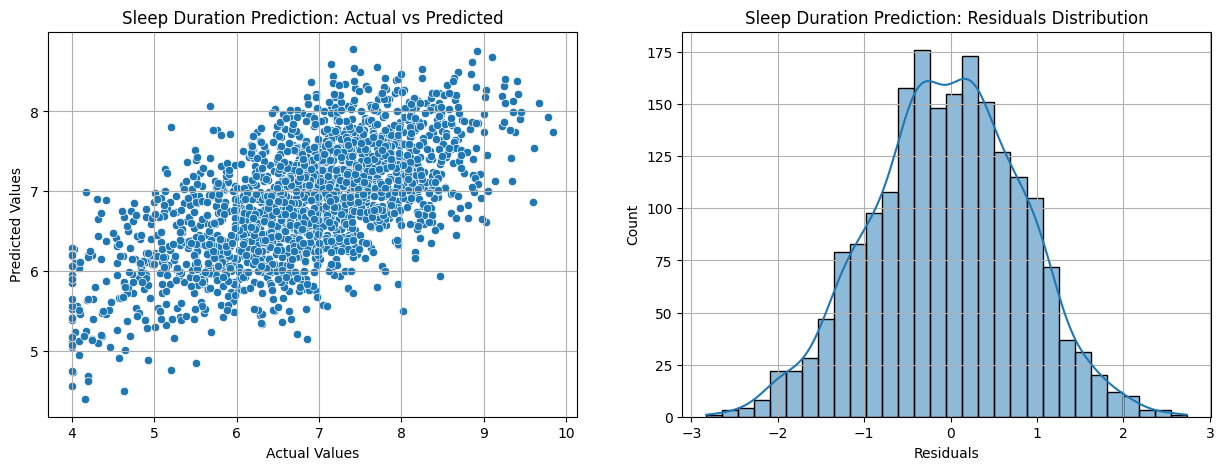


CROSS-VALIDATION RESULTS (Sleep Duration Model)
Average MSE : 0.748543108559352
Average RMSE : 0.8651772996424107
Average R² : 0.4026798470116251


In [23]:

model_sleep_duration = BayesianRidge()
model_sleep_duration.fit(X1_train, y1_train)

pred1 = model_sleep_duration.predict(X1_test)

mse1 = mean_squared_error(y1_test, pred1)
rmse1 = np.sqrt(mse1)
r2_1 = r2_score(y1_test, pred1)

print("SLEEP DURATION MODEL ")
print("MSE :", mse1)
print("RMSE :", rmse1)
print("R² :", r2_1)

print("Coefficients (Sleep Duration Model):")
for feature, coef in zip(X1.columns, model_sleep_duration.coef_):
    print(f"{feature}: {coef}")
print("Intercept:", model_sleep_duration.intercept_)

plot_results(y1_test, pred1, "Sleep Duration Prediction") 
from sklearn.model_selection import KFold, cross_val_score
import numpy as np

# Define 5-fold cross validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Cross-validation for MSE (sklearn returns negative values)
cv_mse = cross_val_score(model_sleep_duration, X1, y1, cv=kf, scoring='neg_mean_squared_error')
cv_rmse = np.sqrt(-cv_mse)

# Cross-validation for R²
cv_r2 = cross_val_score(model_sleep_duration, X1, y1, cv=kf, scoring='r2')

print("\nCROSS-VALIDATION RESULTS (Sleep Duration Model)")
print("Average MSE :", -cv_mse.mean())
print("Average RMSE :", cv_rmse.mean())
print("Average R² :", cv_r2.mean())



#### Metrics

All coefficients are negative, meaning each factor reduces sleep duration.

Stress (–0.273) and caffeine intake (–0.275) have the strongest negative impact.

Screen time (–0.119) also reduces sleep duration but less severely.

Conclusion: Higher stress, more caffeine, and more screen time all contribute to shorter sleep duration.
_______________________________________________________________________________________________ 

MSE = 0.748 → The average prediction error is low, meaning the model performs reasonably well.

RMSE = 0.865 → On average, predictions differ from the true values by about 0.86 hours.

R² = 0.394 → The model explains about 39% of the variance in sleep duration. This is moderate but expected for behavioral data, which naturally contains randomness. 

#### Graph 1: Actual vs Predicted

This scatter plot compares the true sleep duration values with the model’s predictions.
The points follow an upward diagonal trend, which means the model captures the general relationship well.

The spread around the diagonal shows that predictions are not perfect, but the overall pattern is correctly learned.

#### Graph 2: Residuals Distribution

The residuals are centered around zero, which means the model has no major bias (it does not consistently overestimate or underestimate).

Their bell-shaped distribution indicates that the errors are normal and reasonable, confirming that the regression model is appropriate.

## sleep quality Model interpretation

SLEEP QUALITY MODEL
MSE : 1.7478871505511255
RMSE : 1.3220768323176704
R² : 0.3464497409282037
Coefficients (Sleep Quality Model):
caffeine_intake: -0.1336364802404061
screen_time: -0.32469908133482855
stress_level: -0.3408675670808589
Intercept: 9.576354771177241


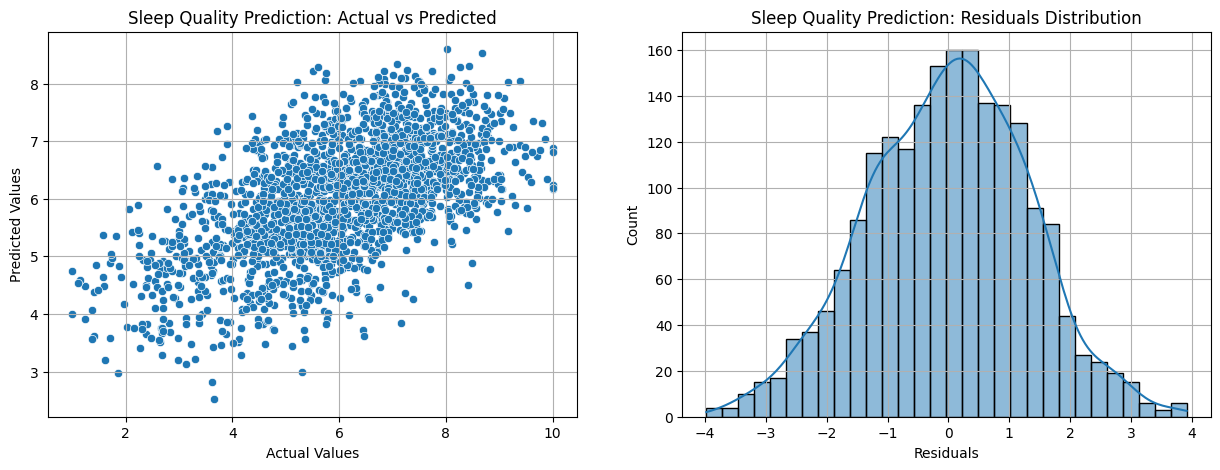


CROSS-VALIDATION RESULTS (Sleep Quality Model)
Average MSE: 1.7737465193033661
Average RMSE: 1.331753857345166
Average R²: 0.35946012586325543


In [22]:
model_sleep_quality = BayesianRidge()
model_sleep_quality.fit(X2_train, y2_train)

pred2 = model_sleep_quality.predict(X2_test)

mse2 = mean_squared_error(y2_test, pred2)
rmse2 = np.sqrt(mse2)
r2_2 = r2_score(y2_test, pred2)

print("SLEEP QUALITY MODEL")
print("MSE :", mse2)
print("RMSE :", rmse2)
print("R² :", r2_2)



print("Coefficients (Sleep Quality Model):")
for feature, coef in zip(X2.columns, model_sleep_quality.coef_):
    print(f"{feature}: {coef}")
print("Intercept:", model_sleep_quality.intercept_) 

plot_results(y2_test, pred2, "Sleep Quality Prediction") 
from sklearn.model_selection import KFold, cross_val_score
import numpy as np

# Define K-Fold (5 folds)
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# MSE (sklearn returns negative values → convert to positive)
cv_mse2 = cross_val_score(model_sleep_quality, X2, y2, cv=kf,
                          scoring='neg_mean_squared_error')
cv_rmse2 = np.sqrt(-cv_mse2)

# R² scores
cv_r2_2 = cross_val_score(model_sleep_quality, X2, y2, cv=kf, scoring='r2')

print("\nCROSS-VALIDATION RESULTS (Sleep Quality Model)")
print("Average MSE:", -cv_mse2.mean())
print("Average RMSE:", cv_rmse2.mean())
print("Average R²:", cv_r2_2.mean())


### Metrics 
All factors have negative effects, indicating they worsen sleep quality.

Stress (–0.341) is the most harmful factor for sleep quality.

Screen time (–0.325) also has a strong negative impact.

Caffeine (–0.134) has a smaller but still negative effect.

Conclusion: Stress and excessive screen time substantially lower sleep quality, while caffeine has a moderate negative effect.
______________________________________________________________________________
MSE = 1.748 → The prediction error is moderate, as sleep quality is more variable and harder to estimate accurately.

RMSE = 1.322 → Predictions deviate from true values by about 1.32 points on average.

R² = 0.346 → The model explains about 34% of the variance, which is acceptable given the complexity and subjectivity of sleep quality.

### Graph 1: Actual vs Predicted

The points show a clear upward trend, indicating that the model captures the general relationship between the features and sleep quality.
However, the spread is larger compared to the sleep duration model, which reflects the fact that sleep quality is harder to predict and influenced by more hidden factors.

### Graph 2: Residuals Distribution

Residuals are centered around zero, meaning there is no systematic bias in the predictions.
The distribution is roughly bell-shaped, confirming that the model's errors behave normally and that the regression is appropriate for this task.

## Academic performance Model Interpretation

#### Interpretation – Linear Regression (Sleep Quality → Academic Performance)

LINEAR MODEL (Sleep Quality → Academic Performance) 
MSE  : 173.60866323100967
RMSE : 13.176064026522097
R²   : 0.317346628094728


c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


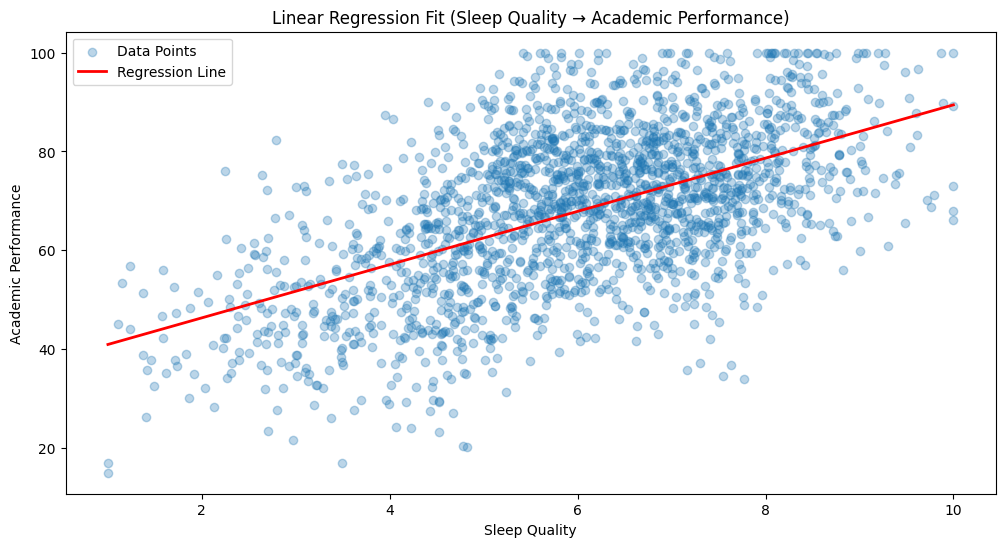

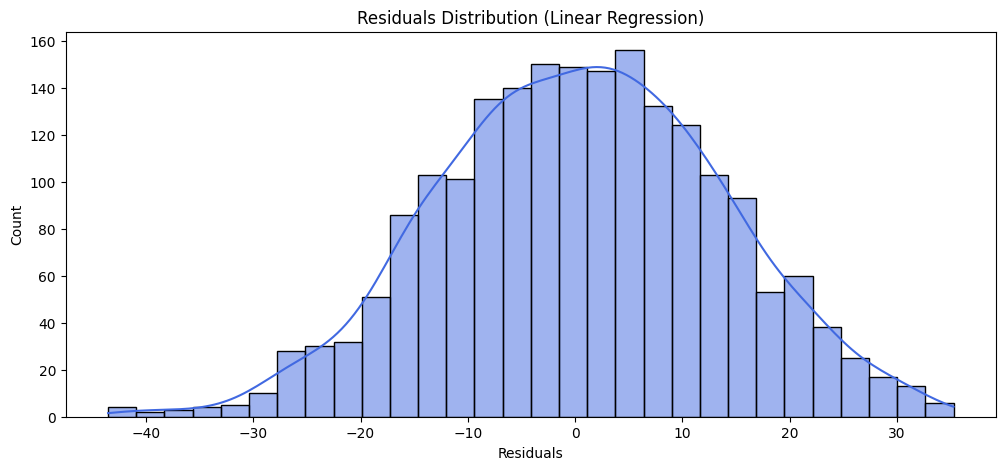

CROSS-VALIDATION RESULTS (Sleep Quality → Academic Performance)
MSE for each fold: [173.60866323 185.36101665 178.44929991 194.31188716 176.5661502 ]
Average MSE: 181.65940343119595
RMSE for each fold: [13.17606403 13.61473528 13.35849168 13.93957988 13.28781962]
Average RMSE: 13.475338095325199
R² for each fold: [0.31734663 0.29808871 0.3068283  0.30570095 0.31638452]
Average R²: 0.3088698202848933

MODEL PARAMETERS:
Intercept: 35.49645323680968
Coefficient (sleep_quality): 5.393829432752749


In [20]:
# Regression Line Plot  

# Linear Regression: academic_performance ~ sleep_quality




X_lin = df[['sleep_quality']]
y_lin = df['academic_performance']

X_train_lin, X_test_lin, y_train_lin, y_test_lin = train_test_split(
    X_lin, y_lin, test_size=0.2, random_state=42
)

model_lin = LinearRegression()
model_lin.fit(X_train_lin, y_train_lin)

pred_lin = model_lin.predict(X_test_lin)

mse_lin = mean_squared_error(y_test_lin, pred_lin)
rmse_lin = np.sqrt(mse_lin)
r2_lin = r2_score(y_test_lin, pred_lin)

print("LINEAR MODEL (Sleep Quality → Academic Performance) ")
print("MSE  :", mse_lin)
print("RMSE :", rmse_lin)
print("R²   :", r2_lin)



plt.figure(figsize=(12,6))
plt.scatter(X_test_lin, y_test_lin, alpha=0.3, label="Data Points")
x_line = np.linspace(X_test_lin.min(), X_test_lin.max(), 200).reshape(-1,1)
y_line = model_lin.predict(x_line)
plt.plot(x_line, y_line, color='red', linewidth=2, label="Regression Line")
plt.xlabel("Sleep Quality")
plt.ylabel("Academic Performance")
plt.title("Linear Regression Fit (Sleep Quality → Academic Performance)")
plt.legend()
plt.show() 

# Residuals Distribution 

residuals_lin = y_test_lin - pred_lin

plt.figure(figsize=(12,5))
sns.histplot(residuals_lin, bins=30, kde=True, color='royalblue')
plt.xlabel("Residuals")
plt.title("Residuals Distribution (Linear Regression)")
plt.show()
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LinearRegression
import numpy as np



# Define 5-fold cross validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Run cross validation for MSE (neg_mean_squared_error because sklearn returns negative values)
cv_mse = cross_val_score(model_lin, X_lin, y_lin, cv=kf, scoring='neg_mean_squared_error')
cv_rmse = np.sqrt(-cv_mse)

# Run cross validation for R²
cv_r2 = cross_val_score(model_lin, X_lin, y_lin, cv=kf, scoring='r2')

print("CROSS-VALIDATION RESULTS (Sleep Quality → Academic Performance)")
print("MSE for each fold:", -cv_mse)
print("Average MSE:", -cv_mse.mean())
print("RMSE for each fold:", cv_rmse)
print("Average RMSE:", cv_rmse.mean())
print("R² for each fold:", cv_r2)
print("Average R²:", cv_r2.mean())

print("\nMODEL PARAMETERS:")
print("Intercept:", model_lin.intercept_)
print("Coefficient (sleep_quality):", model_lin.coef_[0])



The linear model shows that sleep quality has a positive effect on academic performance.
The coefficient (~ 5.39) means that for every 1-point increase in sleep quality, the academic score increases by about 5.4 points on average.
The intercept (~ 35.5) simply represents the expected performance when sleep quality is zero (not meaningful but needed for the model).

The evaluation metrics are moderate:

MSE ≈ 173 and RMSE ≈ 13.17 indicate a noticeable prediction error.

R² ≈ 0.317 means the model explains around 31% of the variation in academic performance.

This suggests that sleep quality does influence academic performance, but it’s not the only factor, and the relationship is not perfectly linear.

The scatter plot also shows a positive trend, while the residuals look roughly normal, meaning the model is statistically reasonable even if the prediction strength is moderate.

### Interpretation of the Polynomial Model (Sleep Duration → Academic Performance)


c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


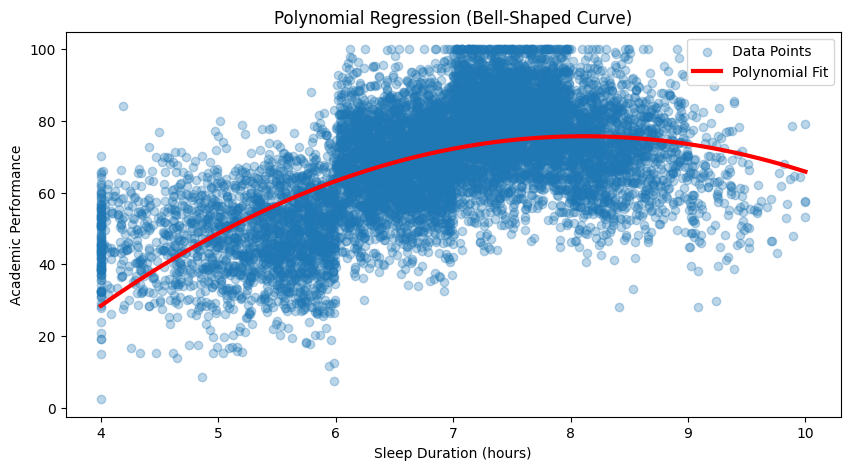

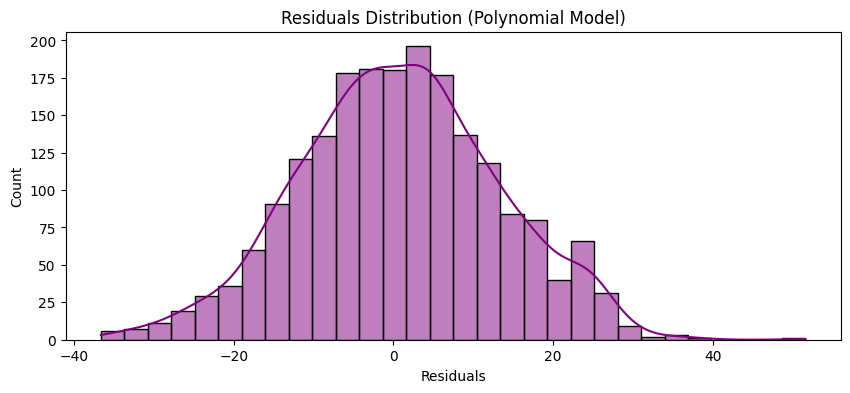


 POLYNOMIAL MODEL (Sleep Duration → Academic Performance) 
MSE  : 156.98594314277835
RMSE : 12.529403143916248
R²   : 0.38270947178743686

POLYNOMIAL MODEL COEFFICIENTS 
Coefficient (sleep_duration)      : 45.30161591147036
Coefficient (sleep_duration²)    : -2.790203214712866
Intercept                         : -108.16288797342887


In [13]:
# POLYNOMIAL CURVE PLOT  
# Polynomial Regression: academic_performance ~ sleep_duration

X_poly = df[['sleep_duration']]
y_poly = df['academic_performance']

poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly_trans = poly.fit_transform(X_poly)

X_train_poly, X_test_poly, y_train_poly, y_test_poly = train_test_split(
    X_poly_trans, y_poly, test_size=0.2, random_state=42
)

model_poly = LinearRegression()
model_poly.fit(X_train_poly, y_train_poly)

pred_poly = model_poly.predict(X_test_poly)

mse_poly = mean_squared_error(y_test_poly, pred_poly)
rmse_poly = np.sqrt(mse_poly)
r2_poly = r2_score(y_test_poly, pred_poly)




plt.figure(figsize=(10,5))
plt.scatter(df['sleep_duration'], df['academic_performance'], 
            alpha=0.3, label="Data Points")
x_curve = np.linspace(df['sleep_duration'].min(), df['sleep_duration'].max(), 300).reshape(-1, 1)
x_curve_poly = poly.transform(x_curve)
y_curve = model_poly.predict(x_curve_poly)

plt.plot(x_curve, y_curve, color='red', linewidth=3, label="Polynomial Fit")

plt.xlabel("Sleep Duration (hours)")
plt.ylabel("Academic Performance")
plt.title("Polynomial Regression (Bell-Shaped Curve)")
plt.legend()
plt.show()   

#  RESIDUALS DISTRIBUTION 

residuals_poly = y_test_poly - pred_poly

plt.figure(figsize=(10,4))
sns.histplot(residuals_poly, bins=30, kde=True, color="purple")
plt.title("Residuals Distribution (Polynomial Model)")
plt.xlabel("Residuals")
plt.show() 

print("\n POLYNOMIAL MODEL (Sleep Duration → Academic Performance) ")
print("MSE  :", mse_poly)
print("RMSE :", rmse_poly)
print("R²   :", r2_poly)

print("\nPOLYNOMIAL MODEL COEFFICIENTS ")
print("Coefficient (sleep_duration)      :", model_poly.coef_[0])
print("Coefficient (sleep_duration²)    :", model_poly.coef_[1])
print("Intercept                         :", model_poly.intercept_)


In [19]:
from sklearn.model_selection import KFold
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
import numpy as np

# Data
X_poly = df[['sleep_duration']]
y_poly = df['academic_performance']

# Polynomial transformation
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly_trans = poly.fit_transform(X_poly)

# K-Fold setup
kf = KFold(n_splits=5, shuffle=True, random_state=42)

mse_scores_poly = []
rmse_scores_poly = []
r2_scores_poly = []

for train_index, test_index in kf.split(X_poly_trans):
    X_train_fold, X_test_fold = X_poly_trans[train_index], X_poly_trans[test_index]
    y_train_fold, y_test_fold = y_poly.iloc[train_index], y_poly.iloc[test_index]
    
    model_poly = LinearRegression()
    model_poly.fit(X_train_fold, y_train_fold)
    
    y_pred_fold = model_poly.predict(X_test_fold)
    
    mse_scores_poly.append(mean_squared_error(y_test_fold, y_pred_fold))
    rmse_scores_poly.append(np.sqrt(mean_squared_error(y_test_fold, y_pred_fold)))
    r2_scores_poly.append(r2_score(y_test_fold, y_pred_fold))

print("CROSS-VALIDATION RESULTS (Polynomial Regression: Sleep Duration → Academic Performance)")

print("Average MSE:", np.mean(mse_scores_poly))
print("Average RMSE:", np.mean(rmse_scores_poly))
print("Average R²:", np.mean(r2_scores_poly))


CROSS-VALIDATION RESULTS (Polynomial Regression: Sleep Duration → Academic Performance)
Average MSE: 163.3404646845524
Average RMSE: 12.77941767598185
Average R²: 0.3781433070657735


The first plot shows that the polynomial curve has a bell-shaped form. This means that academic performance increases when sleep duration increases at first, reaches a peak around 7 hours of sleep, and then starts to decrease when sleep becomes too long. This pattern makes sense: both too little and too much sleep can harm concentration and productivity.

The second plot shows the residuals distribution. The residuals are mostly centered around zero and roughly follow a normal shape, which suggests that the model fits the data reasonably well.

The coefficients also support the bell shape:

the positive coefficient for sleep_duration means performance rises at the beginning,

the negative coefficient for sleep_duration² explains why performance goes down after a certain point.

The R² of about 0.38 indicates that the model explains a fair amount of the variation in academic performance, even if it’s not perfect (which is normal, since many other factors influence grades).

Overall, the model captures the idea that a moderate amount of sleep is the most beneficial for academic performance.

# overall interpretation

Based on all the regression analyses I performed, a clear pattern emerges: students’ daily habits influence their sleep, and sleep in turn affects academic performance.

First, I found that screen time, caffeine intake, and stress levels all negatively impact sleep duration and sleep quality. These habits do not completely determine sleep, but they consistently push it in the wrong direction more stress or more screen time usually meant sleeping less or having poorer quality sleep.

When I moved to the academic performance models, the results confirmed that sleep acts as an intermediate variable.

- Sleep quality showed a positive linear relationship with academic performance, meaning that students who sleep better tend to perform better.

- Sleep duration followed a non-linear (bell-shaped) relationship, where both too little and too much sleep lowered performance, while a moderate amount of sleep produced the best outcomes.

Putting everything together, the overall conclusion is that unhealthy habits indirectly reduce academic performance by harming sleep, while better habits support good sleep, which then contributes to higher academic performance. Even though the models are not perfect predictors (moderate R² values), the trends are consistent and meaningful.



-----------------